Three Pillars of Web Development:   
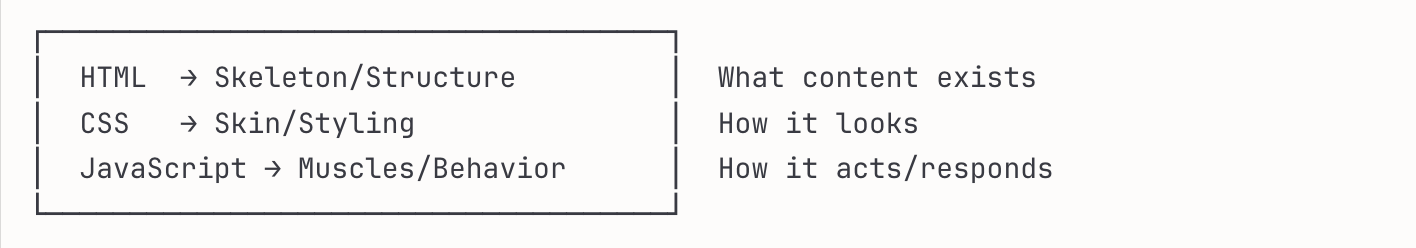

API (Application Programming Interface)   
is a set of rules and protocols that allows different software applications to communicate with each other.

# HTTP Essential
## What is HTTP?
- **H**yper**t**ext **T**ransfer **P**rotocal
- a communication protocol that defines **how clients (browser) and servers communicate**.  
- Request → Server processes → Response

Slides: https://docs.google.com/presentation/d/e/2PACX-1vSxS5iMjTveO-IBqdDE65dgouZStLTW-Vlyt3N9js3FnMCeW8cwSgmrkGzX2i_g0qGCM6fJDKZ-r3Se/pub?start=false&loop=false&delayms=3000&slide=id.g7fabbaef24_1_232

### ⭐️ How HTTP works
![http](./assets/how-http-works.png)
1. **DNS Resolution**  
When you type www.google.com into your browser, your computer doesn't know where that website physically lives. Your **Internet Service Provider (ISP)** forwards your request to a **DNS (Domain Name System)** server, which acts like a phone book for the internet. The DNS server responds with **the IP address for Google's server: 172.217.7.23**.

2. **Establishing Connection**   
Your browser now knows the server's IP address and establishes a **TCP (Transmission Control Protocol)** connection with Google's server at that address. TCP ensures <u>reliable, ordered delivery of data</u> between your computer and the server.

3. **HTTP Request**      
Once connected, your browser **sends an HTTP GET request** to the server. This request asks for the webpage and resources associated with www.google.com.

4. **Server Response**  
The Google server **processes your request and sends back** the necessary <u>files: HTML (the webpage structure), CSS (styling information), JavaScript (interactive functionality), and any API data or JSON (for dynamic content)</u>.

5. **Rendering 渲染**
Your browser receives these files and renders them into the Google homepage you see on your screen.  

The diagram shows "**UDP**" at the top, which is **an alternative to TCP**. While HTTP traditionally uses TCP for reliability, some modern protocols like **HTTP/3** use UDP-based protocols for faster performance. The key difference is that *TCP ensures every packet arrives correctly, while UDP prioritizes speed over guaranteed delivery*.

### HTTP Methods
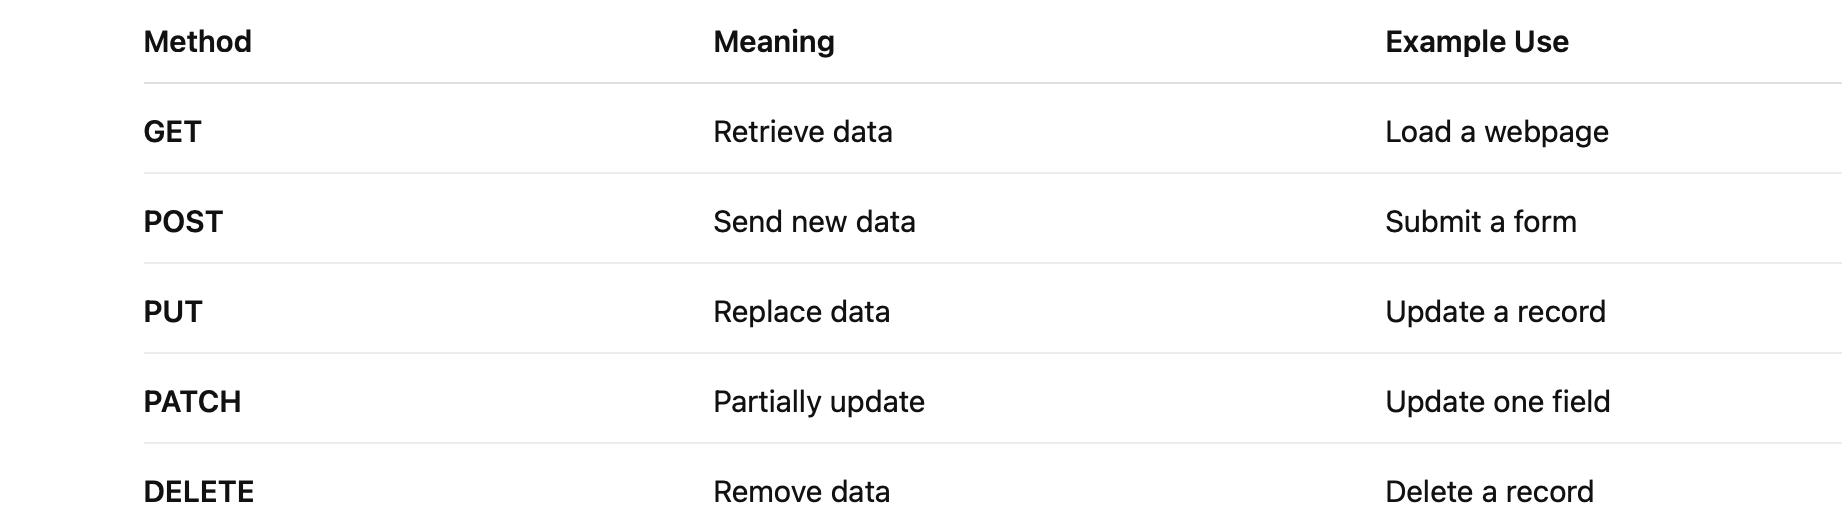

### HTTP Status Codes
```text
- 2xx - Success
  200 OK        – request succeeded
  201 Created   – new resource created
- 4xx - Client Errors
  400 Bad Request   – invalid input
  401 Unauthorized  – authentication needed
  403 Forbidden     – no permission
  404 Not Found     - Resource doesn't exist
- 5xx - Server Errors
  500 Internal Server Error
```
## HTTPS (HTTP Secure)

HTTP: Plain text (insecure)  
HTTPS: Encrypted with SSL/TLS   

- HTTP + TLS encryption
- Protects data integrity, confidentiality, authenticity （完整性、保密性、真实性）
  - Protects data in transit
  - Prevents eavesdropping 窃听
  - Verifies server identity

### ⭐️ How HTTPS works 
to create a secure, encrypted connection between a client and server
![https](./assets/how-https-works.png)
1. **TCP Handshake**  
Before any secure communication happens, the client and server establish a basic *TCP (Transmission Control Protocol)* connection **through a three-way handshake**:

- Client sends TCP SYN (synchronize)
- Server responds with TCP SYN + ACK (synchronize + acknowledge)
- Client sends TCP ACK (acknowledge)

  Once this completes, the **TCP connection is established**.

2. **Certificate Check**    
The TLS/SSL handshake begins with certificate verification:  

- Client Hello: Client initiates the secure connection and sends **supported encryption methods**
- Server Hello: Server responds and chooses encryption methods
- Certificate: Server sends its digital certificate (which contains its **public key**) to prove its identity
- Server Hello Done: Server signals it's finished with this phase

  The **client verifies the certificate** is valid and from a trusted authority.

3. **Key Exchange**   
This is where the magic of HTTPS happens:   

- Client Key Exchange: The client generates **a session key (a symmetric encryption key)** and <u>encrypts it using the server's public key (<font color=red>asymmetric encryption</font>)</u>. Only the **server's private key can decrypt this**.  
- Change Cipher Spec: Both parties signal they're ready to start using the agreed encryption
- Finished: **Both confirm the handshake is complete**

  Now both client and server have the same session key, but **no one eavesdropping on the connection can decrypt** it because they don't have the server's private key.  

4. **Data Transmission**
All subsequent data is encrypted using the session key with symmetric encryption. This is much faster than asymmetric encryption, which is why HTTPS uses <u>asymmetric encryption only for the key exchange and <font color=red>symmetric encryption</font> for the actual data transfer.</u>   

The key insight: HTTPS combines both asymmetric encryption (public/private key pairs) for secure key exchange and symmetric encryption (shared session key) for efficient data transmission.

# To build Server in Python
there are usually 3 packages to choose:    
**Flask**:   
- A fast, lightweight, flexible micro-framework that's perfect for small to medium applications and APIs.
- Best for: Quick prototypes, RESTful APIs, microservices, learning web development
  ```python
    from flask import Flask

    app = Flask(__name__)

    @app.route('/')
    def hello():
        return 'Hello, World!'

    if __name__ == '__main__':
        app.run(debug=True)
  ```

**Django**  
- An old but full-featured, "batteries-included" framework with built-in ORM, admin panel, authentication, and more.
- Best for: Large applications, content management systems, projects needing built-in features like admin panels and ORM
    ```python
    # views.py
    from django.http import HttpResponse

    def hello(request):
        return HttpResponse("Hello, World!")

    # urls.py
    from django.urls import path
    from . import views

    urlpatterns = [
        path('', views.hello),
    ]
    ```

**FastAPI**  

- A modern, high-performance framework designed for building APIs with automatic documentation and type checking.
- Best for: Modern REST APIs, async operations, projects requiring automatic API documentation, high-performance applications 
```python
from fastapi import FastAPI

app = FastAPI()

@app.get('/')
def hello():
    return {"message": "Hello, World!"}

# Run with: uvicorn main:app --reload
```

> To test the server, can use: postman

# Flask Basic


## Routing
Routing is the process of mapping URLs (web addresses) to specific functions in your code. It determines what content or action should happen when someone visits a particular URL    
- The URL is the address/room number
- Routing is the directory that tells you which room does what
- The function is what happens in that room

### hello world web:

In [1]:
!python 1_basic_flask.py

 * Serving Flask app '1_basic_flask'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 911-286-736
127.0.0.1 - - [19/Nov/2025 12:12:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Nov/2025 12:12:30] "GET /favicon.ico HTTP/1.1" 404 -
^C


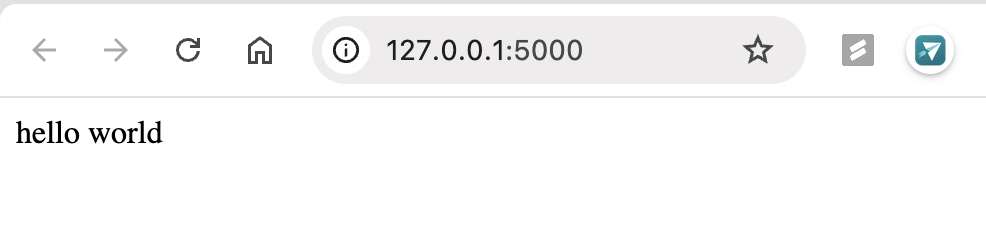

### with html (the skeleton of a webpage)
Flask has a default convention where it looks for HTML templates in a folder named templates, but this isn't strictly required, it's configurable

In [4]:
!python 2_basic_flask_template.py

 * Serving Flask app '2_basic_flask_template'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 911-286-736
127.0.0.1 - - [19/Nov/2025 12:22:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Nov/2025 12:22:31] "GET /users HTTP/1.1" 200 -
^C


pay attention to the address now
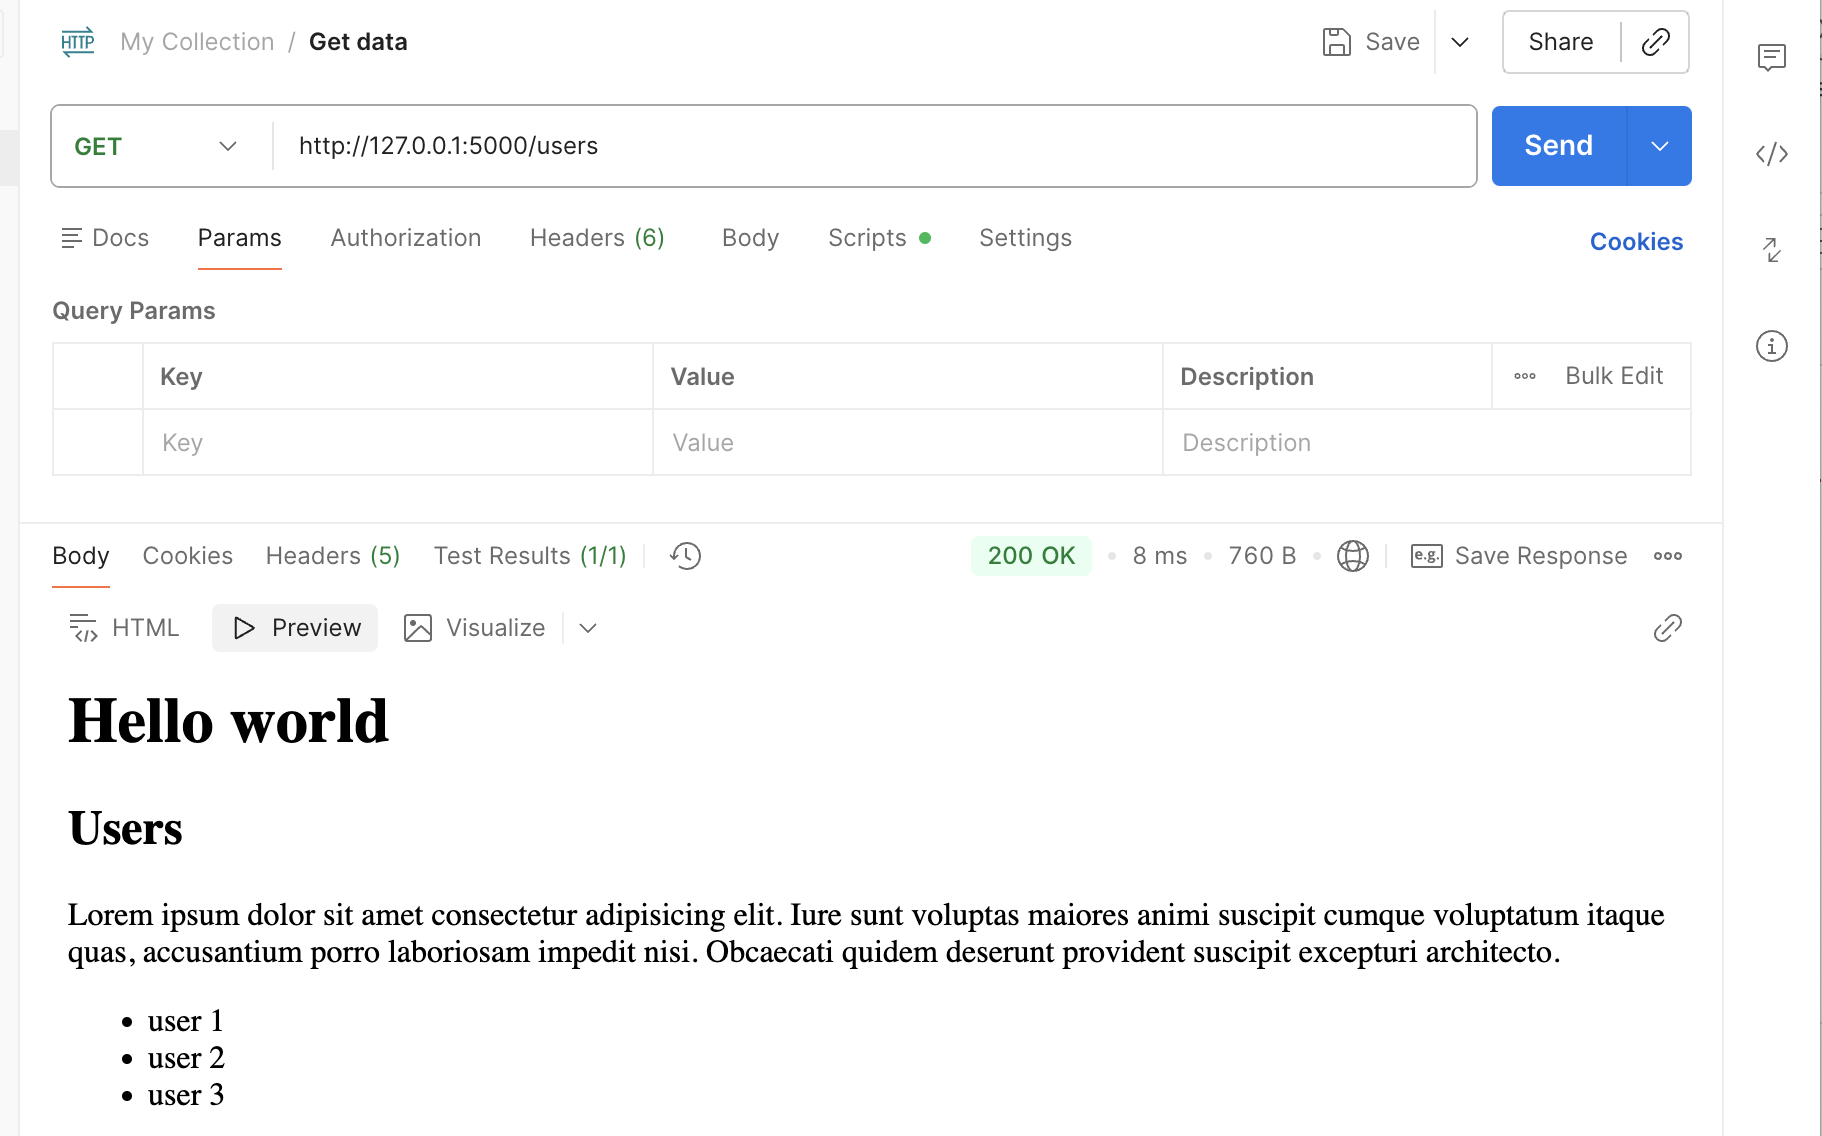

### Jinjia2
Jinja2 is a powerful templating engine for Python that allows you to create **dynamic HTML pages** by embedding Python-like expressions inside your HTML files.  

Jinja2 lets you:
- Insert variables into HTML
- Use loops and conditions
- Reuse template components (like headers/footers)
- Keep your HTML separate from Python logic

In [6]:
!python 3_basic_flask_Jinjia2.py

 * Serving Flask app '3_basic_flask_Jinjia2'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 911-286-736
127.0.0.1 - - [19/Nov/2025 12:31:25] "GET /users HTTP/1.1" 200 -
^C


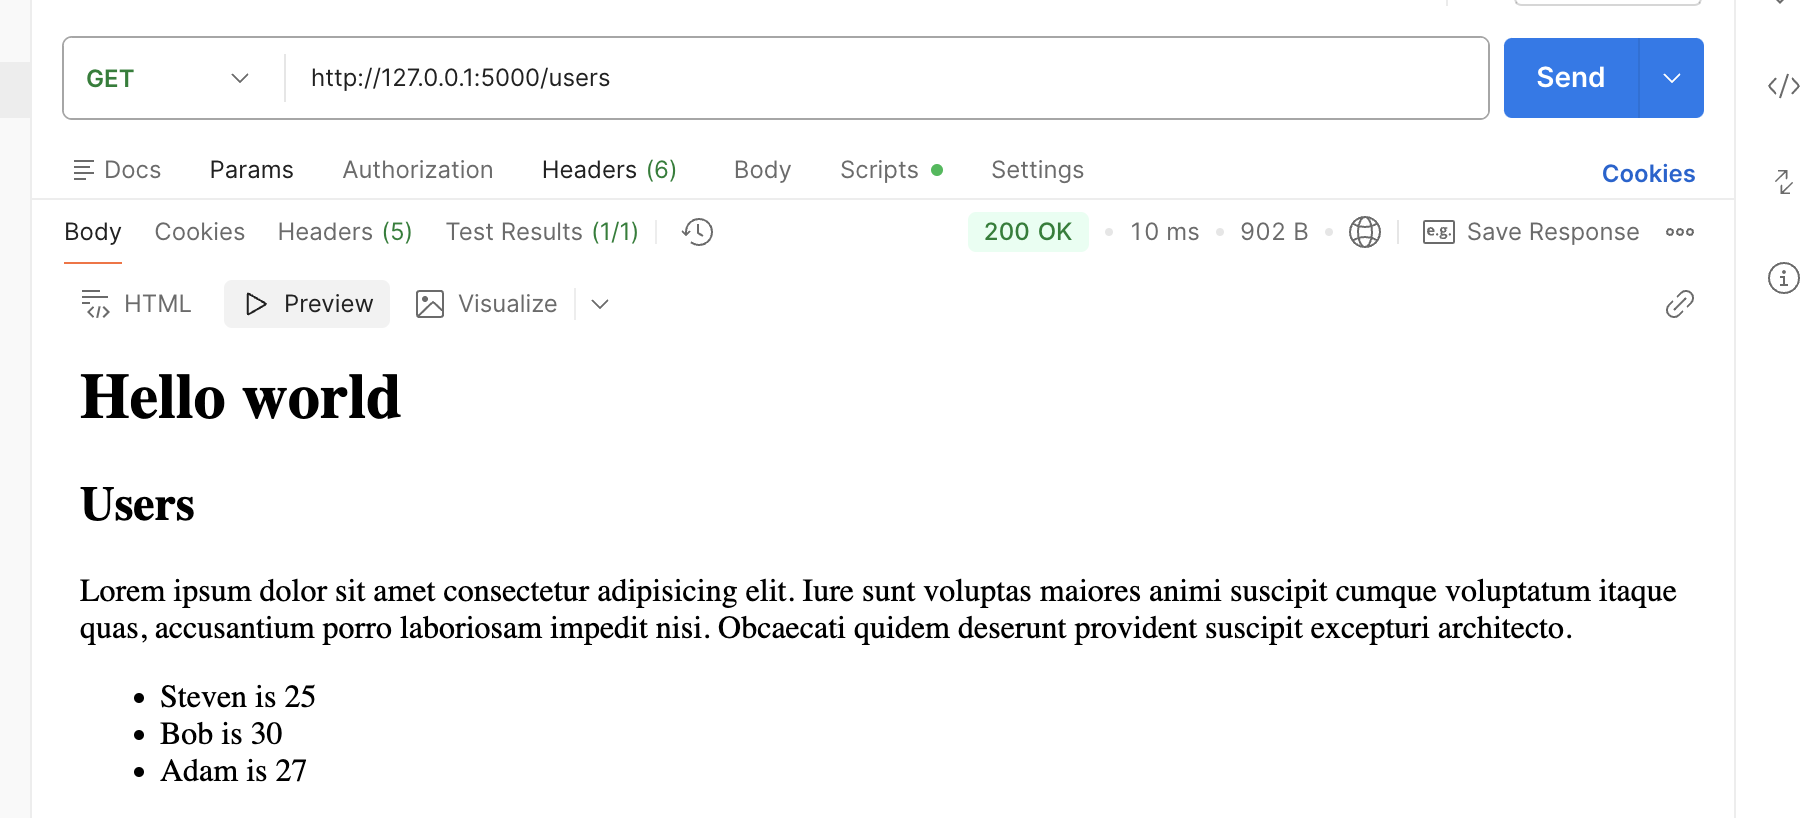

### Backend now focus on providing data
Previous (Traditional) Approach:   
Browser → Server (Flask/Django) → Generates HTML with Jinja2 → Returns *complete HTML page*  
like the previous Jinjia2 example:    

```python
# Backend returns complete HTML
@app.route("/users")
def users():
    users = get_users_from_db()
    return render_template("users.html", users=users)  # HTML
```

#### Nowadays: **Frontend-Backend Separation**  
For backend, we only care about how to give data to frontend

```python
# Backend only returns data
@app.route("/api/users")
def users():
    users = get_users_from_db()
    return jsonify(users)  
    # JSON: [{"name": "Alice", "age": 25}, ...]
```
    
```javascript
// Frontend (React) fetches and displays data
fetch('/api/users')
    .then(response => response.json())
    .then(users => {
        // Render users in React component
});
```

In what format: usually json  
- Json is a common data type that a lot programming languages have methods to code and decode of it.
- can use jsonify to convert data type
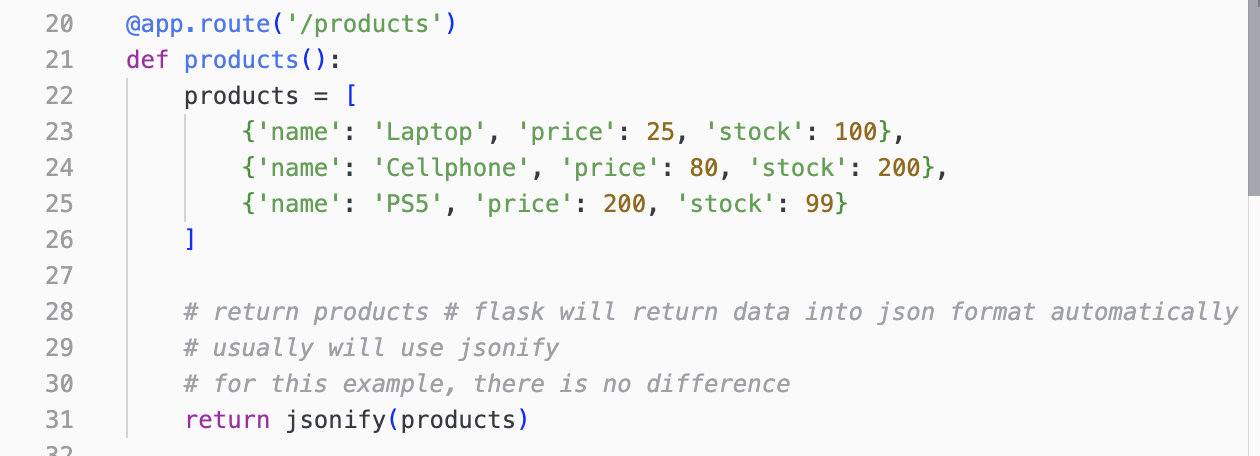

In [7]:
# !python 4_basic_flask_return_json.py

## Dynamic Routing
Dynamic Routing allows you to create flexible URL patterns that can accept variable values, rather than hardcoding every possible URL.  

Instead of creating separate routes for each user:
```python
@app.route("/user/alice")
@app.route("/user/bob")
@app.route("/user/charlie")
# ... (impossible for thousands of users!)
```

Use dynamic routing with URL parameters:  
```python
@app.route("/user/<username>")
def user_profile(username):
    return f"Profile page for {username}"
```

### Type Converters
Specify what type of data you expect:

```python 
# Integer
@app.route("/post/<int:post_id>")
def show_post(post_id):
    return f"Showing post {post_id}"
# /post/abc → 404 error ✗ (not an integer)

# Float
@app.route("/price/<float:amount>")
def show_price(amount):
    return f"Price: ${amount}"

# Path (accepts slashes)
@app.route("/files/<path:filepath>")
def show_file(filepath):
    return f"File path: {filepath}"
# /files/docs/2024/report.pdf → "File path: docs/2024/report.pdf"
```

In [11]:
!python 5_basic_flask_dynamic_routing.py

 * Serving Flask app '5_basic_flask_dynamic_routing'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 911-286-736
id:  2 type of id: <class 'int'>
127.0.0.1 - - [19/Nov/2025 13:09:42] "GET /products/2 HTTP/1.1" 200 -
^C


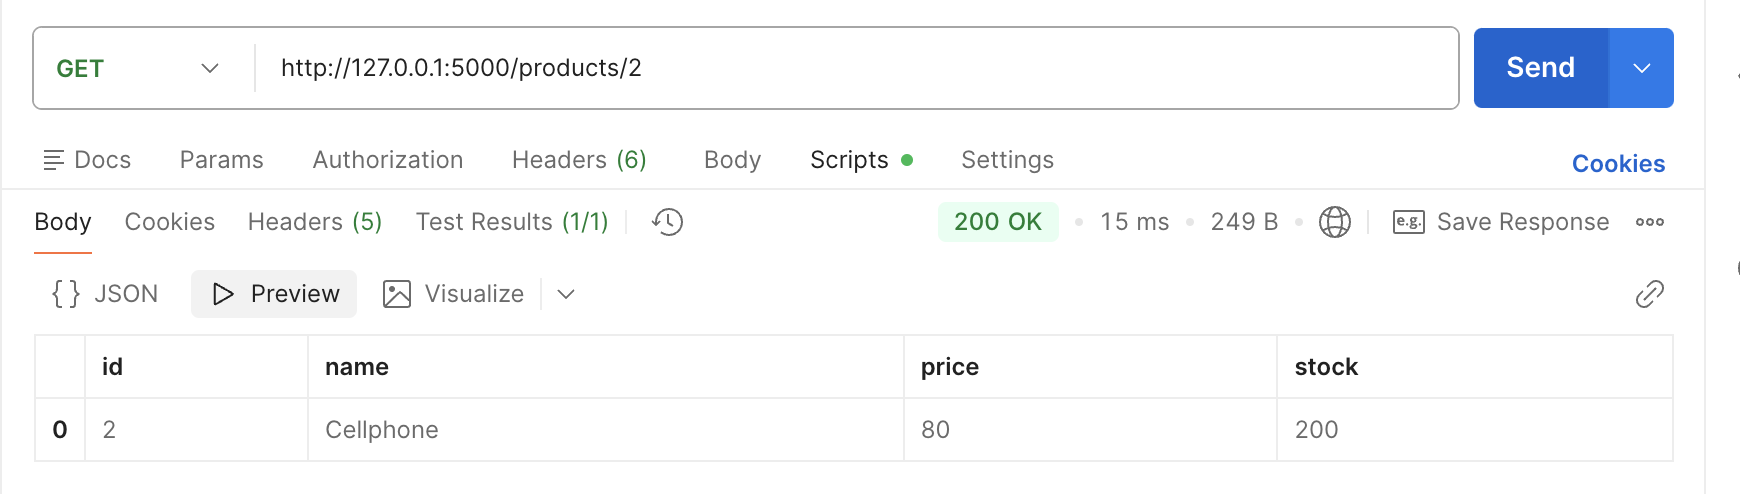

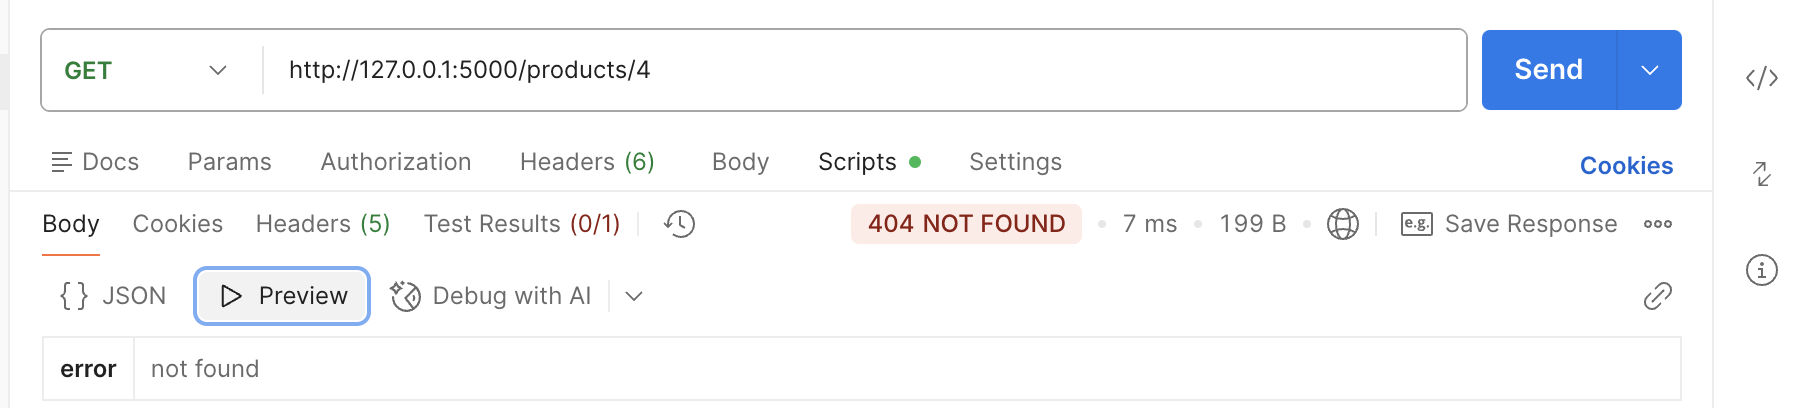
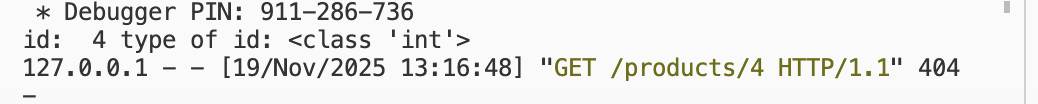

### Multiple Variables
```python 
@app.route("/blog/<int:year>/<int:month>/<slug>")
def show_blog_post(year, month, slug):
    return f"Blog post from {year}/{month}: {slug}"
```

## Request and query string

In [13]:
!python 6_basic_flask_request.py

 * Serving Flask app '6_basic_flask_request'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 911-286-736
{'method': 'GET', 'url': 'http://127.0.0.1:5000/products/4?priceLow=50&priceHigh=10'}
priceLow 50
priceHigh 10
id:  4 type of id: <class 'int'>
127.0.0.1 - - [19/Nov/2025 13:29:24] "GET /products/4?priceLow=50&priceHigh=10 HTTP/1.1" 404 -
^C


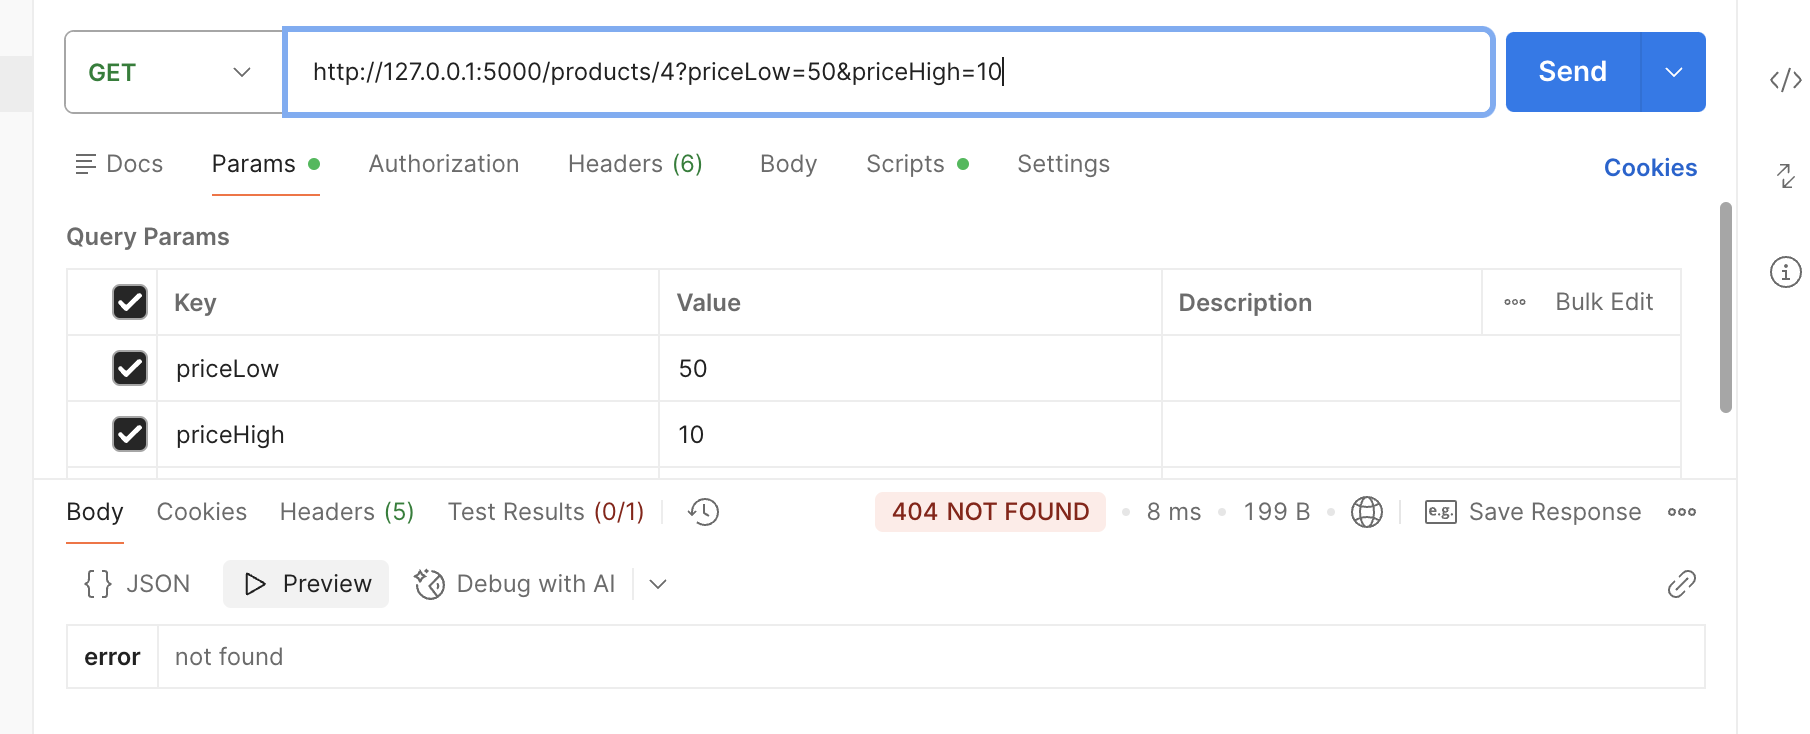

# Flask with Database connection

what need to do:   
in models.py:
1. use flask_sqlalchemy and create db variable:
    ```python
    from flask_sqlalchemy import SQLAlchemy

    class Base (DeclarativeBase):
        pass

    db = SQLAlchemy(model_class=Base)
    ```

2. change classes' argument like: 
   `class Customer(Base)` ➡️ `class Customer(db.Model):`

3. create db_config.py, inside, define SQLALCHEMY_DATABASE_URI (cannot change the variable name, URI not URL!!!)
4. in basic_server.py:
    ```python
    from models import db, Product

    app = Flask(__name__)

    app.config.from_object('db_config')

    db.init_app(app)
    ```
5. connect successful and can get data from database
    ```python
    products_res = db.session.execute(db.select(Product)).scalars().all()
    ```

In [17]:
!python basic_server.py

 * Serving Flask app 'basic_server'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 911-286-736
127.0.0.1 - - [19/Nov/2025 14:13:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Nov/2025 14:13:11] "GET / HTTP/1.1" 200 -
{'method': 'GET', 'url': 'http://127.0.0.1:5000/products/2'}
priceLow None
priceHigh None
id 2 <class 'int'>
products_res []
127.0.0.1 - - [19/Nov/2025 14:13:36] "GET /products/2 HTTP/1.1" 404 -
127.0.0.1 - - [19/Nov/2025 14:13:39] "GET /products/ HTTP/1.1" 404 -
127.0.0.1 - - [19/Nov/2025 14:13:42] "GET /products HTTP/1.1" 404 -
^C


# RESTful API
**REST (Representational State Transfer)** is an architectural style for designing web services. A RESTful API is an API that follows REST principles to allow communication between clients and servers over HTTP. A style guidance on how to define route, or url.   
<img src="./assets/rest-api.png" width="50%">

## Core Principles of REST:
- **Resource-based**       
    Everything is a "resource" (customer, order, product) identified by a URL:
    ```text
    /api/customers      # Collection of customers     
    /api/customers/5    # Specific customer with ID 5
    ```
- Uses **HTTP methods for CRUD** actions       
    GET /users, POST /users, etc.   
- **Stateless (no session stored on server)**     
    Each request contains all information needed. The server doesn't remember previous requests
    ```python
    # Each request is independent
    GET /api/orders/5  # Request 1
    GET /api/orders/5  # Request 2 (server doesn't know about Request 1)
    ```
- Standard Response Formats (usually **JSON**, sometimes **XML**)
- Use **standard HTTP codes** to indicate results     
    `404 Not Found` - Resource doesn't exist



## why need RESRFUL:  
- if let each team defince their own url, there will be thousands of different url, which is too wasteful and messy  
- Example: Customer API:

    **Non-RESTful way (bad):**
    ```text
    /getCustomer?id=5          # GET
    /createCustomer            # POST
    /updateCustomer?id=5       # POST
    /deleteCustomer?id=5       # POST
    ```

    **RESTful way (good):**
    ```text
    GET    /api/customers/5    # Get customer
    POST   /api/customers      # Create customer
    PUT    /api/customers/5    # Update customer
    DELETE /api/customers/5    # Delete customer
    ```
- Benefits:
  - Standardized: Everyone understands HTTP methods
  - Simple: Easy to learn and use
  - Scalable: Stateless design supports millions of requests
  - Language-independent: Any language can make HTTP requests (Python, JavaScript, Java, etc.)
  - Cacheable: GET requests can be cached for performance
- Use cases:
  - Mobile apps communicating with servers
  - Web applications (frontend talking to backend)
  - Third-party integrations (Twitter API, Google Maps API)
  - Microservices communicating with each other

In [6]:
!python restful_service.py

 * Serving Flask app 'restful_service'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 911-286-736
<Product(id=4, name='icecream', price=$3.00, stock=300)>
127.0.0.1 - - [20/Nov/2025 10:53:43] "GET /products/4 HTTP/1.1" 200 -
127.0.0.1 - - [20/Nov/2025 10:54:14] "POST /products HTTP/1.1" 201 -
127.0.0.1 - - [20/Nov/2025 10:54:21] "GET /products HTTP/1.1" 200 -
^C


GET: 
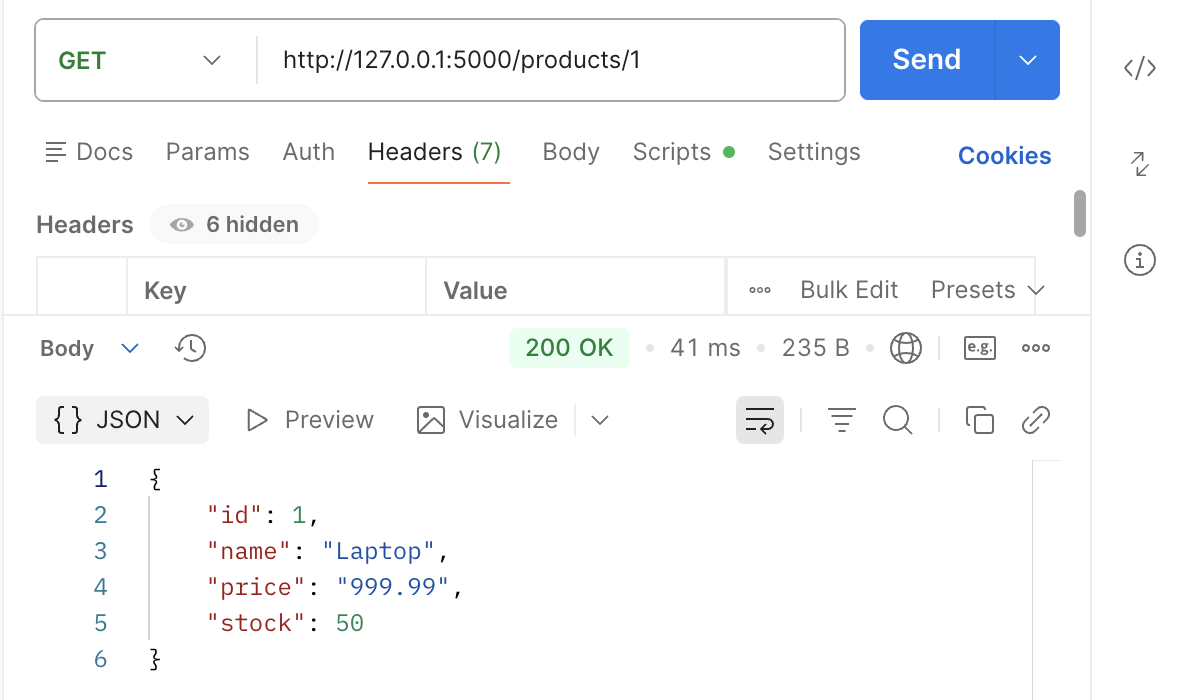

POST:
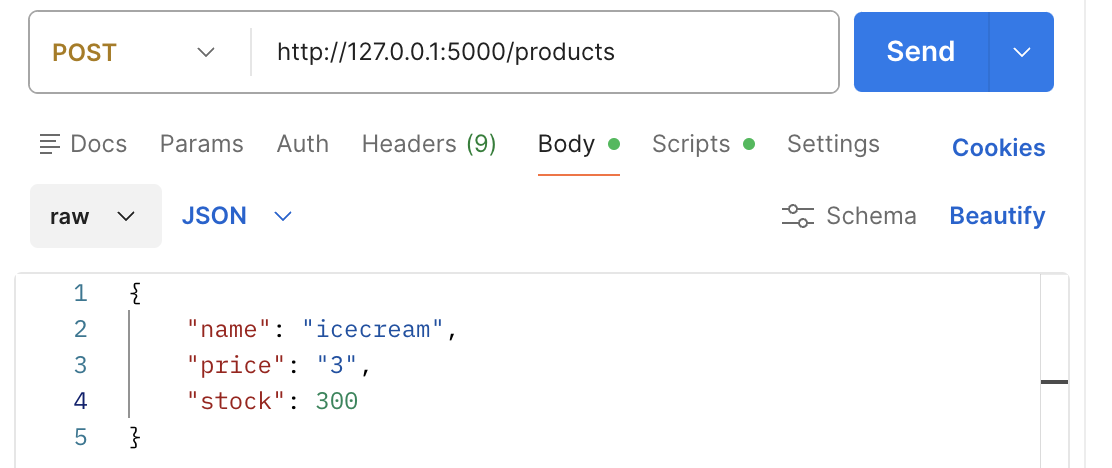
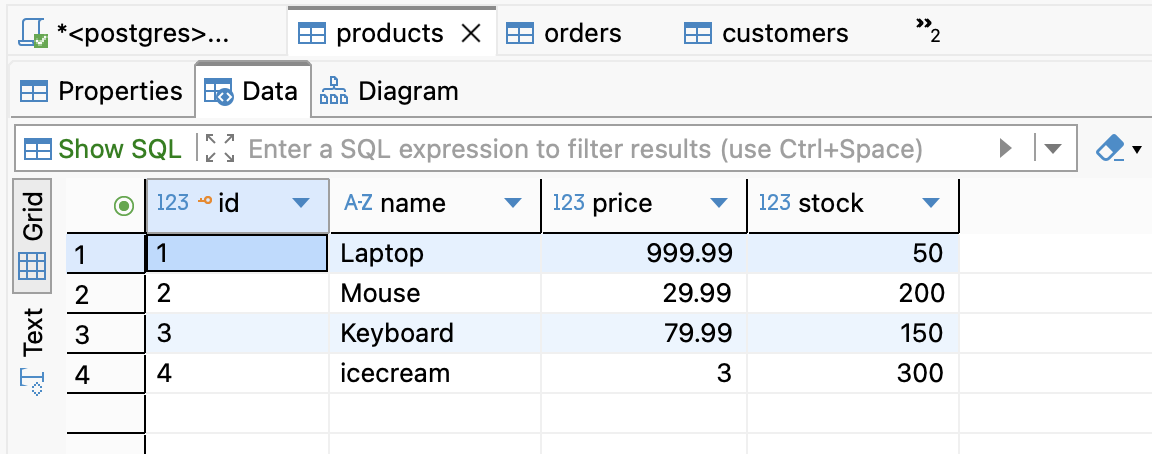

# Blueprint
- A Blueprint is a way to **organize your Flask application into smaller, reusable modules**. Think of it as a "mini Flask app" that you can plug into your main app
- Divide different services into modules or different service files, and plug them in the main file

```python
# products_service.py
from flask import Blueprint
products_bp = Blueprint('products', __name__)

@products_bp.route('/', methods=['GET'])
def products():
    ...
@products_bp.route('/<int:id>', methods=['GET'])
def get_product(id):
    ...

# customers_service.py
customers_bp = Blueprint('customers', __name__)

@customers_bp.route('/', methods=['GET'])
def customers():
    ...

# app.py - Clean and simple!
app.register_blueprint(products_bp)
app.register_blueprint(customers_bp)

@app.route('/')  # Root path
def home():
```

# MVC
**Model-View-Controller**, a design pattern that separates your application into **three interconnected components**.

**1. Model (Data Layer)**        

What it does: **Manages data and business logic**      

Responsibilities:

- Database operations (CRUD)
- Data validation
- Business rules

Think of it as: The kitchen's inventory and recipes       

**2. View (Presentation Layer)** 

What it does: **Displays data to users**       

Responsibilities:     
- HTML templates
- JSON responses
- User interface

Think of it as: The menu and how food is presented    

**3. Controller** (Logic Layer)    

What it does: **Handles user requests and coordinates Model & View**     

Responsibilities:   
- Route handling
- Request/response processing
- Calling Model methods
- Selecting which View to show

Think of it as: The waiter taking orders and bringing food     

Our ecommerce system: 
- models.py : Model
- customers_service.py: Controller
- JSON response or HTML template: View
```text
User Request
    ↓
┌─────────────────┐
│   CONTROLLER    │ ← Receives request
│  (app routes)   │
└─────────────────┘
    ↓           ↑
    ↓           ↑
┌─────────┐   ┌──────┐
│  MODEL  │   │ VIEW │
│(models) │   │(JSON)│
└─────────┘   └──────┘
    ↓
┌──────────┐
│ DATABASE │
└──────────┘
```

**Flow:**

1. User makes request → Controller
2. Controller asks Model for data
3. Model queries Database
4. Model returns data to Controller
5. Controller passes data to View
6. View formats data (HTML/JSON)
7. Controller sends response to User


Benefits of MVC   
- ✅ Separation of Concerns: Each part has one job
- ✅ Easier Testing: Test Model, View, Controller separately
- ✅ Team Collaboration: Frontend devs work on Views, backend on Models
- ✅ Maintainability: Easy to find and fix bugs
- ✅ Reusability: Same Model can have multiple Views (HTML, JSON, XML)
- ✅ Scalability: Easy to add new features
